# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (7)(component kg in one M^3 concrete):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

Output variables (3):
* SLUMP (cm)
* FLOW (cm)
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [2]:
df=pd.read_csv("cement_slump .csv")

# EDA and Graphical analysis

In [3]:
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [5]:
df.describe()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000,103.000
mean,229.894,77.974,149.015,197.168,8.540,883.979,739.605,18.049,49.611,36.039
std,78.877,60.461,85.418,20.208,2.808,88.391,63.342,8.751,17.569,7.837
min,137.000,0.000,0.000,160.000,4.400,708.000,640.600,0.000,20.000,17.190
25%,152.000,0.050,115.500,180.000,6.000,819.500,684.500,14.500,38.500,30.900
50%,248.000,100.000,164.000,196.000,8.000,879.000,742.700,21.500,54.000,35.520
75%,303.900,125.000,235.950,209.500,10.000,952.800,788.000,24.000,63.750,41.205
max,374.000,193.000,260.000,240.000,19.000,1049.900,902.000,29.000,78.000,58.530


In [6]:
df.duplicated().value_counts()

False    103
dtype: int64

In [7]:
df.shape

(103, 10)

In [8]:
df.ndim

2

In [9]:
df.sample(2)

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
83,140.200,30.500,239.000,169.400,5.300,1028.400,742.700,21.250,46.000,36.320
89,150.300,111.400,238.800,167.300,6.500,999.500,670.500,14.500,36.500,38.190


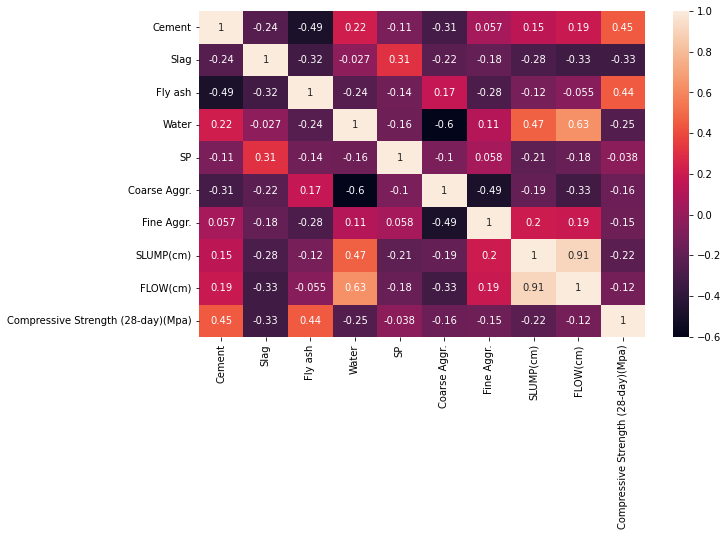

In [10]:
sns.heatmap(df.corr(),annot=True);

# Data Preprocessing 

### Features and target variable

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y=df["Compressive Strength (28-day)(Mpa)"]
X=df.drop(["Compressive Strength (28-day)(Mpa)"],axis=1)

### Splitting data into training and testing

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

## Scaling

In [14]:
X_train

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm)
53,309.000,0.000,142.000,218.000,10.000,912.000,680.000,24.000,62.000
22,148.000,180.000,0.000,183.000,11.000,972.000,757.000,0.000,20.000
68,320.000,127.000,164.000,211.000,6.000,721.000,723.000,2.000,20.000
44,298.000,107.000,0.000,186.000,6.000,879.000,815.000,3.000,20.000
98,248.300,101.000,239.100,168.900,7.700,954.200,640.600,0.000,20.000
...,...,...,...,...,...,...,...,...,...
71,313.000,112.000,0.000,220.000,10.000,794.000,789.000,23.000,58.000
14,374.000,0.000,0.000,190.000,7.000,1013.000,730.000,14.500,42.500
92,303.800,0.200,239.800,236.400,8.300,780.100,715.300,25.000,78.000
51,342.000,136.000,0.000,225.000,11.000,770.000,747.000,21.000,61.000


In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.99742015, -1.29720985, -0.03597016,  1.05552803,  0.49979299,
         0.26854971, -0.94918597,  0.70678525,  0.76407019],
       [-1.04096079,  1.65777393, -1.64936204, -0.65655824,  0.84332212,
         0.95172686,  0.28924939, -1.96043118, -1.59112335],
       [ 1.13668842,  0.78769537,  0.21399196,  0.71311078, -0.87432353,
        -1.90623086, -0.2575922 , -1.73816315, -1.59112335],
       [ 0.85815189,  0.45936384, -1.64936204, -0.50980799, -0.87432353,
        -0.10719771,  1.2220968 , -1.62702913, -1.59112335],
       [ 0.22891256,  0.36086438,  1.06727175, -1.34628443, -0.29032401,
         0.74905097, -1.58287887, -1.96043118, -1.59112335],
       [-0.90169252,  0.60711303,  0.04356324, -1.04789225,  2.21743863,
         0.73538743, -0.30584293,  0.65121824,  0.34349992],
       [ 0.80750889,  0.44294726, -0.10414165,  0.51744378, -0.87432353,
        -1.61018743,  0.62700448,  0.70678525, -0.07707036],
       [-0.93967478, -1.29720985,  1.11158322, -0.80330849,  0

In [17]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[ 1.20700595e+00, -1.29699379e+00, -6.11771266e-04,
        -5.45910657e-01, -1.54368248e+00,  3.87192351e-02,
         4.84601671e-01,  6.00778724e-01,  3.68226590e-01],
       [-8.18255335e-01, -1.29699379e+00,  1.36975587e+00,
        -9.24979465e-01,  1.96563629e+00, -8.86902138e-02,
         1.28484152e+00,  1.87127799e-01, -2.90041492e-02],
       [ 9.19549509e-01,  5.81047868e-01, -2.34165648e+00,
         5.37143079e-01,  6.49641748e-01,  1.66128684e-01,
         4.67345825e-02,  7.38662365e-01,  5.66841959e-01],
       [ 7.62755087e-01,  3.52874583e-01, -6.14422275e-01,
        -6.54216031e-01,  2.10976902e-01,  4.32530259e-01,
        -6.93109808e-01,  7.38662365e-01,  4.34431713e-01],
       [-8.96652546e-01,  1.26556772e+00,  3.41980138e-01,
         1.58074271e-01,  1.08830659e+00, -4.36170529e-01,
        -4.81725696e-01, -9.15941333e-01, -1.08828612e+00],
       [-1.09264557e+00,  1.80967325e+00,  8.98691990e-01,
         4.82990392e-01,  1.08830659e+00, -1.328036

In [18]:
pd.DataFrame(X_train_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,0.000,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [19]:
pd.DataFrame(X_test_scaled).agg(["mean", "std"]).round()

,0,1,2,3,4,5,6,7,8
mean,0.000,-0.000,0.000,0.000,0.000,-0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [20]:
print("X_train_range  :", np.min(X_train_scaled), "-", np.max(X_train_scaled))
print("X_test_range   :", np.min(X_test_scaled), "-", np.max(X_test_scaled))

X_train_range  : -2.0542525748610143 - 3.5915551444418226
X_test_range   : -2.7084286730270972 - 2.1303779677376964


##  1. Model Building (Linear Regression)

In [21]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

### 1.1 Interpret the model

In [22]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_pred = lm.predict(X_test_scaled)
y_train_pred = lm.predict(X_train_scaled)

### 1.2 Model Evaluation

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [25]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls.round(2)

,linear_train,linear_test
R2,0.910,0.870
mae,1.940,2.160
mse,5.870,6.550
rmse,2.420,2.560


In [27]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

NameError: name 'Ridge' is not defined

In [ ]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,4.449
1,-2.033
2,4.260
3,-4.843
4,0.326
5,-5.332
6,-2.611


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1)

In [ ]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [ ]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.890,0.871
mae,1.967,2.169
mse,6.935,6.550
rmse,2.633,2.559


In [ ]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.891,0.876,0.890,0.871
mae,1.944,2.141,1.967,2.169
mse,6.899,6.286,6.935,6.550
rmse,2.627,2.507,2.633,2.559


In [ ]:
from sklearn.model_selection import cross_validate, cross_val_score

In [ ]:
model = Ridge(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.014,0.000,0.970,-0.988,-2.256,-1.502
2,0.000,0.008,0.959,-1.347,-2.922,-1.710
3,0.008,0.000,0.464,-3.104,-14.723,-3.837
4,0.000,0.008,0.667,-2.974,-15.052,-3.880
5,0.008,0.000,0.665,-2.259,-6.274,-2.505
6,0.000,0.000,0.907,-1.038,-2.599,-1.612
7,0.000,0.008,0.861,-2.998,-17.346,-4.165
8,0.000,0.000,0.905,-2.286,-8.951,-2.992
9,0.008,0.000,0.833,-2.567,-10.670,-3.267
10,0.000,0.000,0.843,-2.502,-7.291,-2.700


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                             0.807
test_neg_mean_absolute_error       -2.206
test_neg_mean_squared_error        -8.809
test_neg_root_mean_squared_error   -2.817
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.890,0.871
mae,1.967,2.169
mse,6.935,6.550
rmse,2.633,2.559


In [ ]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [ ]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,4.449,5.095
1,-2.033,-1.235
2,4.260,5.009
3,-4.843,-4.135
4,0.326,0.428
5,-5.332,-4.205
6,-2.611,-1.824


In [ ]:
rm = Ridge(alpha=0.02).fit(X_train_scaled, y_train) # 'GridSearchCV' object has no attribute 'coef_'
rm.coef_

array([ 4.51611127, -1.95895856,  4.33613944, -4.78515217,  0.33584395,
       -5.23577783, -2.54135644])

In [ ]:
rgm_df = pd.DataFrame(rm.coef_, columns=["ridge_coef_0.02"])

## 2.2 Lasso (Apply and evalute)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1)

In [ ]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [ ]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.762,0.790
mae,3.076,2.440
mse,15.061,10.626
rmse,3.881,3.260


In [ ]:
model = Lasso(alpha=1)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=10)

In [ ]:
pd.DataFrame(scores, index = range(1, 11))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.001,0.000,0.837,-2.758,-12.213,-3.495
2,0.000,0.001,0.826,-3.216,-12.281,-3.504
3,0.000,0.001,0.368,-3.717,-17.350,-4.165
4,0.001,0.000,0.584,-3.081,-18.816,-4.338
5,0.001,0.000,0.292,-2.942,-13.243,-3.639
6,0.000,0.001,0.684,-2.426,-8.801,-2.967
7,0.001,0.000,0.606,-5.385,-49.163,-7.012
8,0.000,0.001,0.846,-2.856,-14.582,-3.819
9,0.001,0.000,0.680,-3.705,-20.482,-4.526
10,0.001,0.001,0.786,-2.776,-9.908,-3.148


In [ ]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.651
test_neg_mean_absolute_error        -3.286
test_neg_mean_squared_error        -17.684
test_neg_root_mean_squared_error    -4.061
dtype: float64

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.762,0.790
mae,3.076,2.440
mse,15.061,10.626
rmse,3.881,3.260


In [ ]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [ ]:
pd.concat([lm_df, rm_df, rgm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_coef_0.02,lasso_coef_1
0,4.449,5.095,4.516,4.754
1,-2.033,-1.235,-1.959,0.000
2,4.260,5.009,4.336,4.832
3,-4.843,-4.135,-4.785,-1.244
4,0.326,0.428,0.336,0.000
5,-5.332,-4.205,-5.236,-0.479
6,-2.611,-1.824,-2.541,-0.000


## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5)
elastic_model.fit(X_train_scaled, y_train)

ElasticNet(alpha=1)

In [ ]:
y_pred = elastic_model.predict(X_test_scaled)
y_train_pred = elastic_model.predict(X_train_scaled)

In [ ]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.613,0.633
mae,3.933,3.395
mse,24.514,18.567
rmse,4.951,4.309


In [ ]:
pd.concat([ls,rs, lss, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elastic_train,elastic_test
R2,0.891,0.876,0.890,0.871,0.762,0.790,0.613,0.633
mae,1.944,2.141,1.967,2.169,3.076,2.440,3.933,3.395
mse,6.899,6.286,6.935,6.550,15.061,10.626,24.514,18.567
rmse,2.627,2.507,2.633,2.559,3.881,3.260,4.951,4.309


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
elastic_model = ElasticNet(max_iter=10000)

In [ ]:
param_grid = {"alpha":[0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
            "l1_ratio":[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]}

In [ ]:
grid_model = GridSearchCV(estimator = elastic_model, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [ ]:
grid_model.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 49 candidates, totalling 490 fits
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.1; total time=   0.0s
[CV] END ...........................alpha=0.01, l1_ratio=0.5; total time=   0.0s
[CV] END ...........................alpha=0.01

GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000),
             param_grid={'alpha': [0.01, 0.012, 0.2, 0.5, 0.6, 0.7, 1],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [ ]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [ ]:
pd.DataFrame(grid_model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001,0.000,0.000,0.000,0.010,0.100,"{'alpha': 0.01, 'l1_ratio': 0.1}",-1.488,-1.686,-3.846,-3.906,-2.503,-1.593,-4.114,-3.033,-3.268,-2.713,-2.815,0.940,1
1,0.001,0.000,0.000,0.000,0.010,0.500,"{'alpha': 0.01, 'l1_ratio': 0.5}",-1.478,-1.671,-3.857,-3.929,-2.504,-1.585,-4.077,-3.073,-3.271,-2.730,-2.818,0.944,4
2,0.001,0.001,0.000,0.000,0.010,0.700,"{'alpha': 0.01, 'l1_ratio': 0.7}",-1.477,-1.666,-3.865,-3.941,-2.508,-1.583,-4.059,-3.096,-3.273,-2.743,-2.821,0.945,6
3,0.001,0.001,0.000,0.000,0.010,0.900,"{'alpha': 0.01, 'l1_ratio': 0.9}",-1.482,-1.666,-3.877,-3.955,-2.517,-1.584,-4.042,-3.129,-3.276,-2.770,-2.830,0.946,8
4,0.001,0.001,0.000,0.000,0.010,0.950,"{'alpha': 0.01, 'l1_ratio': 0.95}",-1.485,-1.667,-3.881,-3.958,-2.522,-1.586,-4.038,-3.140,-3.276,-2.782,-2.834,0.945,10
5,0.001,0.001,0.000,0.000,0.010,0.990,"{'alpha': 0.01, 'l1_ratio': 0.99}",-1.489,-1.669,-3.886,-3.961,-2.526,-1.588,-4.035,-3.150,-3.277,-2.786,-2.837,0.945,11
6,0.001,0.001,0.000,0.000,0.010,1,"{'alpha': 0.01, 'l1_ratio': 1}",-1.490,-1.670,-3.886,-3.962,-2.528,-1.588,-4.034,-3.153,-3.277,-2.789,-2.838,0.945,13
7,0.001,0.001,0.000,0.000,0.012,0.100,"{'alpha': 0.012, 'l1_ratio': 0.1}",-1.492,-1.695,-3.843,-3.895,-2.503,-1.602,-4.136,-3.016,-3.268,-2.708,-2.816,0.938,2
8,0.001,0.000,0.000,0.000,0.012,0.500,"{'alpha': 0.012, 'l1_ratio': 0.5}",-1.475,-1.674,-3.856,-3.922,-2.500,-1.592,-4.092,-3.062,-3.271,-2.727,-2.817,0.944,3
9,0.001,0.000,0.000,0.000,0.012,0.700,"{'alpha': 0.012, 'l1_ratio': 0.7}",-1.470,-1.666,-3.865,-3.937,-2.501,-1.590,-4.070,-3.089,-3.273,-2.743,-2.820,0.946,5


In [ ]:
y_pred = grid_model.predict(X_test_scaled) # ElasticNet(alpha=0.01, l1_ratio=0.1)
y_train_pred = grid_model.predict(X_train_scaled)

In [ ]:
train_val(y_train, y_train_pred, y_test, y_pred, "GridSearch")

,GridSearch_train,GridSearch_test
R2,0.891,0.870
mae,1.960,2.168
mse,6.924,6.557
rmse,2.631,2.561
